In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline

In [2]:
df = pd.read_csv('SimulationData.csv')
df

,Fluid Velocity (m/s),Radius (m),Wasp Velocity (m/s),Wasp Endurance (s),Trial 1,Trial 2,Trial 3,Average,Std Dev
0,0.00,0.020,0.34,0.6,2106,2143,2169.0,2139.333333,31.659648
1,0.12,0.020,0.34,0.6,1740,1770,1748.0,1752.666667,15.534907
2,0.16,0.020,0.34,0.6,1560,1574,1579.0,1571.000000,9.848858
3,0.22,0.020,0.34,0.6,1439,1420,1434.0,1431.000000,9.848858
4,0.29,0.020,0.34,0.6,1483,1590,503.0,1192.000000,599.085136
5,0.43,0.020,0.34,0.6,827,905,715.0,815.666667,95.505672
6,0.51,0.020,0.34,0.6,570,533,612.0,571.666667,39.526363
7,0.51,0.020,0.34,1.0,1019,1056,1013.0,1029.333333,23.288051
8,0.51,0.020,0.34,3.0,1354,1326,NaN,1340.000000,19.798990
9,0.51,0.020,0.42,0.6,1218,949,1209.0,1125.333333,152.775434


All simulations were run with a timestep of $dt=0.03s$ for 60 steps, with jitter, directional noise, and adjustment for angle turned on. The cylinder was centered at $x=0.25m$ and the wasp circle was centered at $x=0.40m$. Three trials were run for each parameter case, and the average and standard deviation were then calculated.

In [3]:
W34E06 = df[df['Wasp Velocity (m/s)']==0.34][df['Wasp Endurance (s)'] == 0.6][df['Radius (m)'] == 0.02]

c:\users\13525\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
c:\users\13525\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [4]:
W34E06

,Fluid Velocity (m/s),Radius (m),Wasp Velocity (m/s),Wasp Endurance (s),Trial 1,Trial 2,Trial 3,Average,Std Dev
0,0.00,0.02,0.34,0.6,2106,2143,2169.0,2139.333333,31.659648
1,0.12,0.02,0.34,0.6,1740,1770,1748.0,1752.666667,15.534907
2,0.16,0.02,0.34,0.6,1560,1574,1579.0,1571.000000,9.848858
3,0.22,0.02,0.34,0.6,1439,1420,1434.0,1431.000000,9.848858
4,0.29,0.02,0.34,0.6,1483,1590,503.0,1192.000000,599.085136
5,0.43,0.02,0.34,0.6,827,905,715.0,815.666667,95.505672
6,0.51,0.02,0.34,0.6,570,533,612.0,571.666667,39.526363
49,0.35,0.02,0.34,0.6,1094,1083,1088.0,1088.333333,5.507571


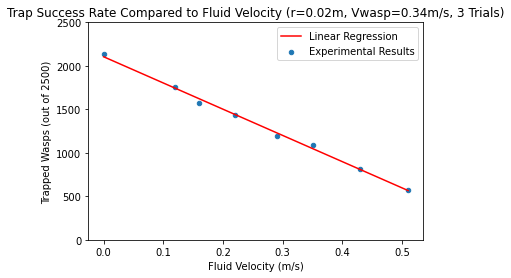

In [5]:
W34E06.plot.scatter('Fluid Velocity (m/s)', 'Average', label="Experimental Results")
plt.ylabel('Trapped Wasps (out of 2500)')
plt.title('Trap Success Rate Compared to Fluid Velocity (r=0.02m, Vwasp=0.34m/s, 3 Trials)')
plt.ylim([0,2500])

slope, intercept, r_value, p_value, std_err = stats.linregress(W34E06['Fluid Velocity (m/s)'], W34E06['Average'])
x = np.arange(0,0.52,0.01)
y = slope * x + intercept
plt.plot(x, y, 'r-', label='Linear Regression')

plt.legend()

Linear regression gives a slope of -3015.311244859438, an intercept of 2104.1892569634538, and $r=-0.9980481733070666 $ ($r^2=0.9961001562415726$).

Now to compare endurance times with success rate, this trend is similar among different fluid velocities and wasp flight speeds.

In [6]:
W34V51 = df[df['Wasp Velocity (m/s)'] == 0.34][df['Fluid Velocity (m/s)'] == 0.51][df['Radius (m)'] == 0.02]
W34V51

c:\users\13525\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
c:\users\13525\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,Fluid Velocity (m/s),Radius (m),Wasp Velocity (m/s),Wasp Endurance (s),Trial 1,Trial 2,Trial 3,Average,Std Dev
6,0.51,0.02,0.34,0.6,570,533,612.0,571.666667,39.526363
7,0.51,0.02,0.34,1.0,1019,1056,1013.0,1029.333333,23.288051
8,0.51,0.02,0.34,3.0,1354,1326,NaN,1340.000000,19.798990


(0.0, 2500.0)

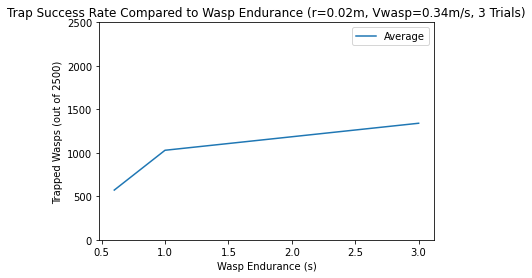

In [7]:
W34V51.plot('Wasp Endurance (s)', 'Average')
plt.title('Trap Success Rate Compared to Wasp Endurance (r=0.02m, Vwasp=0.34m/s, 3 Trials)')
plt.ylabel('Trapped Wasps (out of 2500)')
plt.ylim([0,2500])

All of the parameter groups follow a trend where there is diminishing return for the success rate as endurance increases. This is likely because most of the wasps are able to make it to the target before they run out of endurance when it is high enough. I will need to run more parameters to get a better handle on the shape of the graph. I haven't run a linear regression on this data because I am not sure whether it is linear or something else.

Now we will look at how the success rate varies from different wasp flight speeds while keeping other parameters constant.

In [8]:
E06V51 = df[df['Wasp Endurance (s)'] == 0.6][df['Fluid Velocity (m/s)'] == 0.51][df['Radius (m)'] == 0.02]
E06V51

c:\users\13525\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
c:\users\13525\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,Fluid Velocity (m/s),Radius (m),Wasp Velocity (m/s),Wasp Endurance (s),Trial 1,Trial 2,Trial 3,Average,Std Dev
6,0.51,0.02,0.34,0.6,570,533,612.0,571.666667,39.526363
9,0.51,0.02,0.42,0.6,1218,949,1209.0,1125.333333,152.775434
12,0.51,0.02,0.50,0.6,1499,1479,1464.0,1480.666667,17.559423


(0.0, 2500.0)

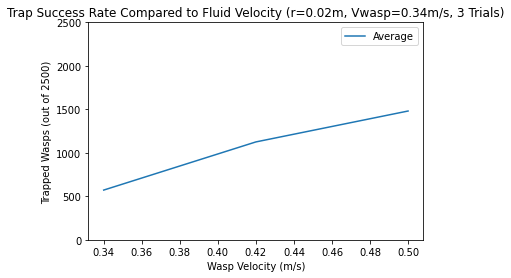

In [9]:
E06V51.plot('Wasp Velocity (m/s)', 'Average')
plt.ylabel('Trapped Wasps (out of 2500)')
plt.title('Trap Success Rate Compared to Fluid Velocity (r=0.02m, Vwasp=0.34m/s, 3 Trials)')
plt.ylim([0,2500])

Now to compare different cylinder sizes, there was some issue with running the $r=0.04m$ case with the current time step ($dt=0.03$). I then increased the time step to $dt=0.05$, and Planktos ran without any issues (recognizing sticky boundary collisions). This will need to be fixed when gathering final data.

In [10]:
V35W34 = df[df['Wasp Endurance (s)'] == 0.6][df['Fluid Velocity (m/s)'] == 0.35][df['Wasp Velocity (m/s)'] == 0.34]
V35W34

c:\users\13525\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
c:\users\13525\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,Fluid Velocity (m/s),Radius (m),Wasp Velocity (m/s),Wasp Endurance (s),Trial 1,Trial 2,Trial 3,Average,Std Dev
47,0.35,0.005,0.34,0.6,84,88,91.0,87.666667,3.511885
48,0.35,0.010,0.34,0.6,97,75,73.0,81.666667,13.316656
49,0.35,0.020,0.34,0.6,1094,1083,1088.0,1088.333333,5.507571
50,0.35,0.040,0.34,0.6,2174,2142,NaN,2158.000000,22.627417


(0.0, 2500.0)

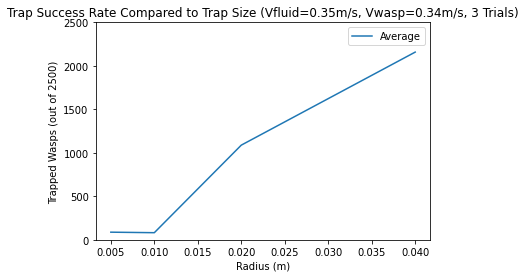

In [11]:
V35W34.plot('Radius (m)', 'Average')
plt.title('Trap Success Rate Compared to Trap Size (Vfluid=0.35m/s, Vwasp=0.34m/s, 3 Trials)')
plt.ylabel('Trapped Wasps (out of 2500)')
plt.ylim([0,2500])